In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("infamouscoder/depression-reddit-cleaned")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'depression-reddit-cleaned' dataset.
Path to dataset files: /kaggle/input/depression-reddit-cleaned


In [2]:
import os

In [3]:
os.listdir(path)

['depression_dataset_reddit_cleaned.csv']

In [4]:
import pandas as pd


In [5]:
df =pd.read_csv(f'{path}/depression_dataset_reddit_cleaned.csv')

In [6]:
df.head()

,clean_text,is_depression
0,we understand that most people who reply immed...,1
1,welcome to r depression s check in post a plac...,1
2,anyone else instead of sleeping more when depr...,1
3,i ve kind of stuffed around a lot in my life d...,1
4,sleep is my greatest and most comforting escap...,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7731 entries, 0 to 7730
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_text     7731 non-null   object
 1   is_depression  7731 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [8]:
import re

In [9]:
def clean_text_data(text):
    """
    Removes URLs, @mentions, and hashtags from a string.
    """
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove @mentions
    text = re.sub(r'@\w+', '', text)
    # Remove hashtags
    text = re.sub(r'#\w+', '', text)
    return text

In [10]:
df['processed_text'] = df['clean_text'].apply(clean_text_data)

In [11]:
df.head()

,clean_text,is_depression,processed_text
0,we understand that most people who reply immed...,1,we understand that most people who reply immed...
1,welcome to r depression s check in post a plac...,1,welcome to r depression s check in post a plac...
2,anyone else instead of sleeping more when depr...,1,anyone else instead of sleeping more when depr...
3,i ve kind of stuffed around a lot in my life d...,1,i ve kind of stuffed around a lot in my life d...
4,sleep is my greatest and most comforting escap...,1,sleep is my greatest and most comforting escap...


In [12]:
!pip install transformers

In [13]:
from transformers import BertTokenizerFast

# 1. Load the tokenizer for the 'bert-base-uncased' model
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

# 2. Taking one example
example_text = df['processed_text'].iloc[0]
print(f"Original Text: {example_text}\n")

# 3. Tokenize the example text
# The paper mentions key parameters we'll need later, like a max length of 512.
encoded_output = tokenizer(example_text)

print("Tokenizer Output:")
print(encoded_output)

# we can also see the actual tokens (subwords)
tokens = tokenizer.convert_ids_to_tokens(encoded_output['input_ids'])
print("\nTokens:")
print(tokens)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (856 > 512). Running this sequence through the model will result in indexing errors


Original Text: we understand that most people who reply immediately to an op with an invitation to talk privately mean only to help but this type of response usually lead to either disappointment or disaster it usually work out quite differently here than when you say pm me anytime in a casual social context we have huge admiration and appreciation for the goodwill and good citizenship of so many of you who support others here and flag inappropriate content even more so because we know that so many of you are struggling yourselves we re hard at work behind the scene on more information and resource to make it easier to give and get quality help here this is just a small start our new wiki page explains in detail why it s much better to respond in public comment at least until you ve gotten to know someone it will be maintained at r depression wiki private contact and the full text of the current version is below summary anyone who while acting a a helper invite or accepts private conta

In [14]:
'''
Outputs:

input_ids: These are the numerical representations of the tokens.

token_type_ids: This is used to distinguish between two different sentences (not important for our task, so it's all zeros).

attention_mask: This tells the model which tokens are real and which are padding (all 1s for now, since there's no padding).

Token indices sequence length is longer than the specified maximum sequence length for this model (856 > 512).

Yes, it is time to tokenize the whole dataset, but we must do it in a way that handles these long posts. We will tell the tokenizer to:

Truncate (cut) any posts that are longer than 512 tokens.

Pad any posts that are shorter than 512 tokens so they are all the same length.
 '''

"\nOutputs:\n\ninput_ids: These are the numerical representations of the tokens.\n\ntoken_type_ids: This is used to distinguish between two different sentences (not important for our task, so it's all zeros).\n\nattention_mask: This tells the model which tokens are real and which are padding (all 1s for now, since there's no padding).\n\nToken indices sequence length is longer than the specified maximum sequence length for this model (856 > 512).\n\nYes, it is time to tokenize the whole dataset, but we must do it in a way that handles these long posts. We will tell the tokenizer to:\n\nTruncate (cut) any posts that are longer than 512 tokens.\n\nPad any posts that are shorter than 512 tokens so they are all the same length.\n "

In [15]:
print("Tokenizing the entire dataset...")

encodings = tokenizer(
    df['processed_text'].tolist(),
    max_length=512,
    padding='max_length',
    truncation=True,
    return_tensors='pt'  # return the output as PyTorch tensors instead of regular Python lists.
)

print("Tokenization complete.")

# Let's check the shape of the resulting tensors
print("Shape of input_ids:", encodings['input_ids'].shape)
print("Shape of attention_mask:", encodings['attention_mask'].shape)

Tokenizing the entire dataset...
Tokenization complete.
Shape of input_ids: torch.Size([7731, 512])
Shape of attention_mask: torch.Size([7731, 512])


In [16]:
encodings

{'input_ids': tensor([[  101,  2057,  3305,  ..., 15185,  3593,   102],
        [  101,  6160,  2000,  ...,     0,     0,     0],
        [  101,  3087,  2842,  ...,     0,     0,     0],
        ...,
        [  101,  2667,  2000,  ...,     0,     0,     0],
        [  101,  1057,  5603,  ...,     0,     0,     0],
        [  101,  7771,  6919,  ...,     0,     0,     0]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}

In [17]:
# 1. Get the input IDs for the first sentence (index 0)
first_sentence_ids = encodings['input_ids'][0]
print("Encoded Input IDs")
print(first_sentence_ids)

# 2. Decode these IDs back into text
decoded_text = tokenizer.decode(first_sentence_ids)
print("\nDecoded Text:")
print(decoded_text)

Encoded Input IDs
tensor([  101,  2057,  3305,  2008,  2087,  2111,  2040,  7514,  3202,  2000,
         2019,  6728,  2007,  2019,  8468,  2000,  2831,  9139,  2812,  2069,
         2000,  2393,  2021,  2023,  2828,  1997,  3433,  2788,  2599,  2000,
         2593, 10520,  2030,  7071,  2009,  2788,  2147,  2041,  3243, 11543,
         2182,  2084,  2043,  2017,  2360,  7610,  2033, 15933,  1999,  1037,
        10017,  2591,  6123,  2057,  2031,  4121, 17005,  1998, 12284,  2005,
         1996, 22875,  1998,  2204,  9068,  1997,  2061,  2116,  1997,  2017,
         2040,  2490,  2500,  2182,  1998,  5210, 15884,  4180,  2130,  2062,
         2061,  2138,  2057,  2113,  2008,  2061,  2116,  1997,  2017,  2024,
         8084, 25035,  2057,  2128,  2524,  2012,  2147,  2369,  1996,  3496,
         2006,  2062,  2592,  1998,  7692,  2000,  2191,  2009,  6082,  2000,
         2507,  1998,  2131,  3737,  2393,  2182,  2023,  2003,  2074,  1037,
         2235,  2707,  2256,  2047, 15536,  32

In [18]:
from sklearn.model_selection import train_test_split
import torch

In [19]:
# preparing labels into tensors
labels = torch.tensor(df['is_depression'].values)

In [20]:

train_inputs, test_inputs, train_masks, test_masks, train_labels, test_labels = train_test_split(
    encodings['input_ids'],
    encodings['attention_mask'],
    labels,
    random_state=42,
    test_size=0.2,
    stratify=labels
)

In [21]:
from transformers import BertModel
import torch.nn as nn


In [22]:

class FineTunedBERT(nn.Module):
    def __init__(self):
        super(FineTunedBERT, self).__init__()
        # 1. Load the pre-trained BERT model
        self.bert = BertModel.from_pretrained('bert-base-uncased')
        self.config = self.bert.config
        self.base_model_prefix = 'bert'
        # 2. Add a dropout layer for regularization p = 0.3
        self.dropout = nn.Dropout(0.3)

        # 3. Add a final linear layer for classification
        # BERT-base's hidden size is 768. Output is 2 for our two classes.
        self.classifier = nn.Linear(768, 2)

    @property
    def device(self):
        return self.bert.device

    def get_input_embeddings(self):
        return self.bert.get_input_embeddings()

    def forward(self, input_ids, attention_mask=None):
        # Get the output from the BERT model
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)

        # The paper uses the 'pooler_output' for classification
        pooler_output = outputs.pooler_output

        # Apply dropout
        dropout_output = self.dropout(pooler_output)

        # Pass through the final linear layer
        logits = self.classifier(dropout_output)

        return (logits,)

# Now, you can create an instance of your model
model = FineTunedBERT()

# You can print the model to see its structure
print(model)

FineTunedBERT(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise

In [23]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [24]:
batch_size = 16

In [25]:
# --- Create DataLoader for the Training Set ---

# 1. Combine the training inputs into a TensorDataset.
train_data = TensorDataset(train_inputs, train_masks, train_labels)

# 2. Create a sampler that will randomly select samples.
train_sampler = RandomSampler(train_data)

# 3. Create the DataLoader.
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)




In [26]:
# --- Create DataLoader for the Testing Set ---

# 1. Combine the testing inputs into a TensorDataset.
test_data = TensorDataset(test_inputs, test_masks, test_labels)

# 2. Create a sampler that will pass through the data sequentially.
test_sampler = SequentialSampler(test_data)

# 3. Create the DataLoader.
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


In [27]:
print(f"Created a training DataLoader with {len(train_dataloader)} batches of size {batch_size}.")
print(f"Created a testing DataLoader with {len(test_dataloader)} batches of size {batch_size}.")

Created a training DataLoader with 387 batches of size 16.
Created a testing DataLoader with 97 batches of size 16.


In [28]:
# The paper specifies the AdamW optimizer with a specific learning rate and other parameters.
optimizer = torch.optim.AdamW(model.parameters(),
                              lr=2e-5,          # Learning Rate
                              eps=1e-8,         # AdamW epsilon
                              weight_decay=1e-2 # Weight decay
                             )

In [29]:
loss_function = nn.CrossEntropyLoss()

In [30]:
from transformers import get_linear_schedule_with_warmup

# Check if a GPU is available and set the device
if torch.cuda.is_available():
    device = torch.device("cuda")
    print('GPU is available:', torch.cuda.get_device_name(0))
else:
    device = torch.device("cpu")
    print('No GPU available, using the CPU instead.')

# Move the model to the selected device
model.to(device)

GPU is available: Tesla T4


FineTunedBERT(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise

In [31]:
''' epochs = 10
# Total number of training steps is [number of batches] x [number of epochs].
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer,
                                            num_warmup_steps = int(0.1 * total_steps), # 10% of total steps
                                            num_training_steps = total_steps)

# --- Start Training ---
for epoch in range(0, epochs):
    print(f"\n======== Epoch {epoch + 1} / {epochs} ========")
    print("Training...")

    total_train_loss = 0
    model.train() # Put the model in training mode

    # Loop through each batch of data in the training dataloader
    for step, batch in enumerate(train_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            print(f"  Batch {step} of {len(train_dataloader)}.")

        # Unpack the batch and move tensors to the GPU
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients
        model.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch)
        logits = model(b_input_ids, attention_mask=b_input_mask)

        # Calculate the loss
        loss = loss_function(logits, b_labels)
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients
        loss.backward()

        # Update the parameters and take a step using the computed gradient
        optimizer.step()

        # Update the learning rate
        scheduler.step()

    # Calculate the average loss over all the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"\n  Average training loss: {avg_train_loss:.4f}")

print("\nTraining complete!") '''

' epochs = 10\n# Total number of training steps is [number of batches] x [number of epochs].\ntotal_steps = len(train_dataloader) * epochs\n\n# Create the learning rate scheduler.\nscheduler = get_linear_schedule_with_warmup(optimizer,\n                                            num_warmup_steps = int(0.1 * total_steps), # 10% of total steps\n                                            num_training_steps = total_steps)\n\n# --- Start Training ---\nfor epoch in range(0, epochs):\n    print(f"\n======== Epoch {epoch + 1} / {epochs} ========")\n    print("Training...")\n\n    total_train_loss = 0\n    model.train() # Put the model in training mode\n\n    # Loop through each batch of data in the training dataloader\n    for step, batch in enumerate(train_dataloader):\n\n        # Progress update every 50 batches.\n        if step % 50 == 0 and not step == 0:\n            print(f"  Batch {step} of {len(train_dataloader)}.")\n\n        # Unpack the batch and move tensors to the GPU\n       

In [32]:
''' from sklearn.metrics import accuracy_score, precision_recall_fscore_support


print("\nEvaluating on the test set...")

# Put the model in evaluation mode
model.eval()

# Tracking variables
all_preds = []
all_labels = []

# Evaluation loop
with torch.no_grad(): # Turn off gradient calculations
    for batch in test_dataloader:
        # Unpack the batch and move to GPU
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Get model predictions (logits)
        logits = model(b_input_ids, attention_mask=b_input_mask)

        # Move logits and labels to CPU for calculations
        logits = logits.detach().cpu().numpy()
        labels_flat = b_labels.to('cpu').numpy()

        # Store predictions and true labels
        all_preds.extend(np.argmax(logits, axis=1).flatten())
        all_labels.extend(labels_flat.flatten())

# Calculate metrics
def calculate_metrics(preds, labels):
    accuracy = accuracy_score(labels, preds)
    # Get precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = calculate_metrics(all_preds, all_labels)

print(f"\nResults:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}") '''

' from sklearn.metrics import accuracy_score, precision_recall_fscore_support\n\n\nprint("\nEvaluating on the test set...")\n\n# Put the model in evaluation mode\nmodel.eval()\n\n# Tracking variables\nall_preds = []\nall_labels = []\n\n# Evaluation loop\nwith torch.no_grad(): # Turn off gradient calculations\n    for batch in test_dataloader:\n        # Unpack the batch and move to GPU\n        b_input_ids = batch[0].to(device)\n        b_input_mask = batch[1].to(device)\n        b_labels = batch[2].to(device)\n\n        # Get model predictions (logits)\n        logits = model(b_input_ids, attention_mask=b_input_mask)\n\n        # Move logits and labels to CPU for calculations\n        logits = logits.detach().cpu().numpy()\n        labels_flat = b_labels.to(\'cpu\').numpy()\n\n        # Store predictions and true labels\n        all_preds.extend(np.argmax(logits, axis=1).flatten())\n        all_labels.extend(labels_flat.flatten())\n\n# Calculate metrics\ndef calculate_metrics(preds, l

In [33]:
SAVE_PATH = 'fine_tuned_bert_model.pth'

In [34]:
'''
# Save the model's state dictionary
torch.save(model.state_dict(), SAVE_PATH)

print(f"Model saved to {SAVE_PATH}") '''

'\n# Save the model\'s state dictionary\ntorch.save(model.state_dict(), SAVE_PATH)\n\nprint(f"Model saved to {SAVE_PATH}") '

In [35]:
# CPU
''' # 1. Re-create the model's architecture
#    (You must have the FineTunedBERT class defined in your notebook)
model = FineTunedBERT()

# 2. Load the saved weights into the new model instance
model.load_state_dict(torch.load(SAVE_PATH))

# Don't forget to put the model in evaluation mode if you're making predictions
model.eval()

print("Model loaded successfully!") '''

''' # GPU
model = None
# 1. Define your device as the GPU
device = torch.device("cuda")

# 2. Create an instance of the model architecture
model = FineTunedBERT()

# 3. Load your saved weights
model.load_state_dict(torch.load(SAVE_PATH, map_location=device))

# 4. (The missing step) Move the model to the GPU!
model.to(device)

# 5. Put the model in evaluation mode
model.eval() '''

' # GPU\nmodel = None\n# 1. Define your device as the GPU\ndevice = torch.device("cuda")\n\n# 2. Create an instance of the model architecture\nmodel = FineTunedBERT()\n\n# 3. Load your saved weights\nmodel.load_state_dict(torch.load(SAVE_PATH, map_location=device))\n\n# 4. (The missing step) Move the model to the GPU!\nmodel.to(device)\n\n# 5. Put the model in evaluation mode\nmodel.eval() '

In [36]:
''' import numpy as np

from sklearn.metrics import accuracy_score, precision_recall_fscore_support


print("\nEvaluating on the test set...")

# Put the model in evaluation mode
model.eval()

# Tracking variables
all_preds = []
all_labels = []

# Evaluation loop
with torch.no_grad(): # Turn off gradient calculations
    for batch in test_dataloader:
        # Unpack the batch and move to GPU
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Get model predictions (logits)
        logits = model(b_input_ids, attention_mask=b_input_mask)

        # Move logits and labels to CPU for calculations
        logits = logits.detach().cpu().numpy()
        labels_flat = b_labels.to('cpu').numpy()

        # Store predictions and true labels
        all_preds.extend(np.argmax(logits, axis=1).flatten())
        all_labels.extend(labels_flat.flatten())

# Calculate metrics
def calculate_metrics(preds, labels):
    accuracy = accuracy_score(labels, preds)
    # Get precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return accuracy, precision, recall, f1

accuracy, precision, recall, f1 = calculate_metrics(all_preds, all_labels)

print(f"\nResults:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}") '''

' import numpy as np\n\nfrom sklearn.metrics import accuracy_score, precision_recall_fscore_support\n\n\nprint("\nEvaluating on the test set...")\n\n# Put the model in evaluation mode\nmodel.eval()\n\n# Tracking variables\nall_preds = []\nall_labels = []\n\n# Evaluation loop\nwith torch.no_grad(): # Turn off gradient calculations\n    for batch in test_dataloader:\n        # Unpack the batch and move to GPU\n        b_input_ids = batch[0].to(device)\n        b_input_mask = batch[1].to(device)\n        b_labels = batch[2].to(device)\n\n        # Get model predictions (logits)\n        logits = model(b_input_ids, attention_mask=b_input_mask)\n\n        # Move logits and labels to CPU for calculations\n        logits = logits.detach().cpu().numpy()\n        labels_flat = b_labels.to(\'cpu\').numpy()\n\n        # Store predictions and true labels\n        all_preds.extend(np.argmax(logits, axis=1).flatten())\n        all_labels.extend(labels_flat.flatten())\n\n# Calculate metrics\ndef calc

In [37]:
!pip install transformers-interpret

In [38]:
''' from transformers_interpret import SequenceClassificationExplainer

# 1. Create the explainer using the correct class name and import path
explainer = SequenceClassificationExplainer(model, tokenizer)

# 2. Use a sample sentence
text = "I feel lonely."

# 3. Calculate attributions
word_attributions = explainer(text)

# 4. Display the visualization
explainer.visualize() '''

' from transformers_interpret import SequenceClassificationExplainer\n\n# 1. Create the explainer using the correct class name and import path\nexplainer = SequenceClassificationExplainer(model, tokenizer)\n\n# 2. Use a sample sentence\ntext = "I feel lonely."\n\n# 3. Calculate attributions\nword_attributions = explainer(text)\n\n# 4. Display the visualization\nexplainer.visualize() '

In [39]:
# making the BERT+BiLSTM Model

class BERTBILSTM(nn.Module):
    def __init__(self):
        super(BERTBILSTM, self).__init__()
        self.bert = BertModel.from_pretrained('bert-base-uncased')

        # --- Compatibility attributes for the explainer library ---
        self.config = self.bert.config
        self.base_model_prefix = 'bert'

        # --- Model Layers ---
        # The paper specifies a 2-layer BiLSTM
        self.lstm = nn.LSTM(
            input_size=768,       # BERT's hidden size
            hidden_size=768,      # LSTM's hidden size
            num_layers=2,         # Number of LSTM layers
            bidirectional=True,   # Make it bidirectional
            batch_first=True      # Input/output tensors are (batch, seq, feature)
        )

        # The input to the classifier is twice the hidden size because the LSTM is bidirectional
        self.classifier = nn.Linear(768 * 2, 2)

    @property
    def device(self):
        return self.bert.device

    def get_input_embeddings(self):
        return self.bert.get_input_embeddings()

    def forward(self, input_ids, attention_mask=None):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)

        # Use the last_hidden_state as input to the LSTM
        last_hidden_state = outputs.last_hidden_state

        # Pass the sequence to the LSTM
        lstm_output, (h_n, c_n) = self.lstm(last_hidden_state)

        # Concatenate the final hidden states from both directions
        hidden = torch.cat((h_n[-2,:,:], h_n[-1,:,:]), dim=1)

        # Get the final logits
        logits = self.classifier(hidden)

        # Return as a tuple for compatibility
        return (logits,)

# Create an instance of the new model
model_bilstm = BERTBILSTM()

# You can print it to see the new architecture
print(model_bilstm)

BERTBILSTM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

In [41]:
model_bilstm.to(device)

epochs = 10
optimizer_bilstm = torch.optim.AdamW(model_bilstm.parameters(),
                                     lr=2e-5,
                                     eps=1e-8,
                                     weight_decay=1e-2)

# 3. Create a new scheduler for the new optimizer
total_steps = len(train_dataloader) * epochs
scheduler_bilstm = get_linear_schedule_with_warmup(optimizer_bilstm,
                                                   num_warmup_steps=int(0.1 * total_steps),
                                                   num_training_steps=total_steps)
# --- Start Training ---
for epoch in range(0, epochs):
    print(f"\n======== Epoch {epoch + 1} / {epochs} ========")
    print("Training...")

    total_train_loss = 0
    model_bilstm.train() # Put the model in training mode

    # Loop through each batch of data in the training dataloader
    for step, batch in enumerate(train_dataloader):

        # Progress update every 50 batches.
        if step % 50 == 0 and not step == 0:
            print(f"  Batch {step} of {len(train_dataloader)}.")

        # Unpack the batch and move tensors to the GPU
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Always clear any previously calculated gradients
        model_bilstm.zero_grad()

        # Perform a forward pass (evaluate the model on this training batch)
        logits, = model_bilstm(b_input_ids, attention_mask=b_input_mask)

        # Calculate the loss
        loss = loss_function(logits, b_labels)
        total_train_loss += loss.item()

        # Perform a backward pass to calculate the gradients
        loss.backward()

        # Update the parameters and take a step using the computed gradient
        optimizer_bilstm.step()

        # Update the learning rate
        scheduler_bilstm.step()

    # Calculate the average loss over all the batches.
    avg_train_loss = total_train_loss / len(train_dataloader)
    print(f"\n  Average training loss: {avg_train_loss:.4f}")

print("\nTraining complete!")


======== Epoch 1 / 10 ========
Training...
  Batch 50 of 387.
  Batch 100 of 387.
  Batch 150 of 387.
  Batch 200 of 387.
  Batch 250 of 387.
  Batch 300 of 387.
  Batch 350 of 387.

  Average training loss: 0.2591

======== Epoch 2 / 10 ========
Training...
  Batch 50 of 387.
  Batch 100 of 387.
  Batch 150 of 387.
  Batch 200 of 387.
  Batch 250 of 387.
  Batch 300 of 387.
  Batch 350 of 387.

  Average training loss: 0.0459

======== Epoch 3 / 10 ========
Training...
  Batch 50 of 387.
  Batch 100 of 387.
  Batch 150 of 387.
  Batch 200 of 387.
  Batch 250 of 387.
  Batch 300 of 387.
  Batch 350 of 387.

  Average training loss: 0.0213

======== Epoch 4 / 10 ========
Training...
  Batch 50 of 387.
  Batch 100 of 387.
  Batch 150 of 387.
  Batch 200 of 387.
  Batch 250 of 387.
  Batch 300 of 387.
  Batch 350 of 387.

  Average training loss: 0.0048

======== Epoch 5 / 10 ========
Training...
  Batch 50 of 387.
  Batch 100 of 387.
  Batch 150 of 387.
  Batch 200 of 387.
  Batch 250 o

In [43]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import torch

print("\nEvaluating the BERT-BiLSTM model on the test set...")

# Put the model in evaluation mode
model_bilstm.eval()

# Tracking variables
all_preds = []
all_labels = []

# Evaluation loop
with torch.no_grad():
    for batch in test_dataloader:
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        # Get model predictions and unpack the tuple
        logits, = model_bilstm(b_input_ids, attention_mask=b_input_mask)

        logits = logits.detach().cpu().numpy()
        labels_flat = b_labels.to('cpu').numpy()

        all_preds.extend(np.argmax(logits, axis=1).flatten())
        all_labels.extend(labels_flat.flatten())

# Calculate metrics
def calculate_metrics(preds, labels):
    accuracy = accuracy_score(labels, preds)
    # Get precision, recall, and F1-score
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return accuracy, precision, recall, f1


# Calculate metrics using the same function as before
accuracy, precision, recall, f1 = calculate_metrics(all_preds, all_labels)

print(f"\nResults for BERT-BiLSTM:")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")
print(f"  F1-Score: {f1:.4f}")


Evaluating the BERT-BiLSTM model on the test set...

Results for BERT-BiLSTM:
  Accuracy: 0.9851
  Precision: 0.9869
  Recall: 0.9831
  F1-Score: 0.9850


In [44]:
# Define a new save path for the new model
SAVE_PATH_BILSTM = 'bert_bilstm_model.pth'
torch.save(model_bilstm.state_dict(), SAVE_PATH_BILSTM)

print(f"\nModel saved to {SAVE_PATH_BILSTM}")


Model saved to bert_bilstm_model.pth


In [57]:
from transformers_interpret import SequenceClassificationExplainer

# 1. Create the explainer
explainer = SequenceClassificationExplainer(model_bilstm, tokenizer)

# 2. Use a sample sentence
text = "The Avenger Endgame is a good movie but I don't like Captain Marvel in the movie"

# 3. Put the model in TRAIN mode before explaining
model_bilstm.train()

# 4. Calculate attributions (this will now work)
word_attributions = explainer(text)

# 5. Display the visualization
explainer.visualize()

# (Good practice) Put the model back in evaluation mode afterward
model_bilstm.eval()

True Label,Predicted Label,Attribution Label,Attribution Score,Word Importance
0,LABEL_0 (1.00),LABEL_0,3.48,[CLS] the avenge ##r end ##game is a good movie but i don ' t like captain marvel in the movie [SEP]


BERTBILSTM(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_af

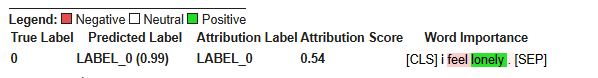

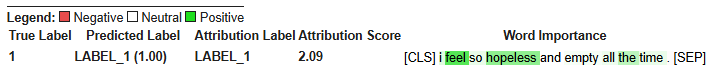

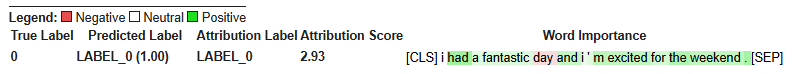

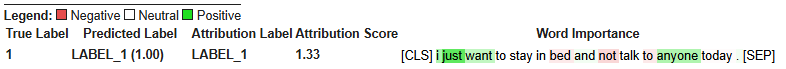

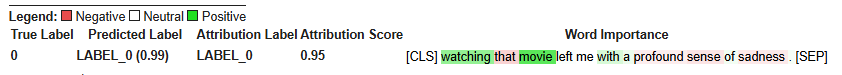

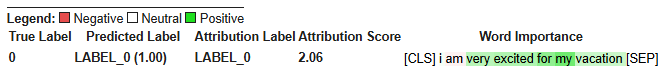

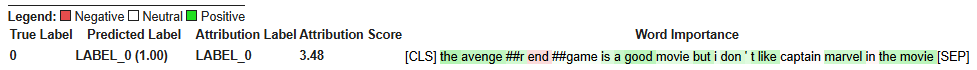